In [1]:
import numpy as np
from collections import defaultdict

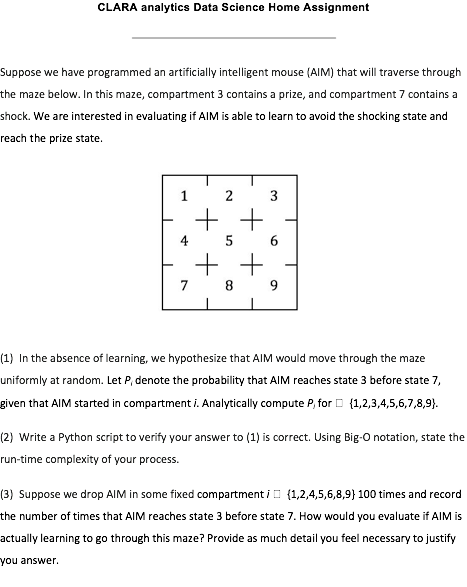

Suppose we have programmed an artificially intelligent mouse (AIM) that will traverse through
the maze below. In this maze, compartment 3 contains a prize, and compartment 7 contains a
shock. We are interested in evaluating if AIM is able to learn to avoid the shocking state and
reach the prize state.

# Question 1

### In the absence of learning, we hypothesize that AIM would move through the mazeuniformly at random. Let P i denote the probability that AIM reaches state 3 before state 7,given that AIM started in compartment i. Analytically compute P i for ∈ {1,2,3,4,5,6,7,8,9}.

#### Let us assume that the AIM never retraces its path while moviing the maze

* The AIM moves through the maze uniformly at random 
* So, if the AIM is placed in a room, it possible for the AIM to move through any of the doors in that room with equal
* For instance, if the AIM is placed in room 1, the probability of the AIM going to room 2 is 0.5, same as its probability to go to room 4, i.e., 0.5
* For room 2, the probabililty that the AIM moves to room 1, 3 or 5 is one-third
* We can frame the equations in the following way-

#### $ P(i) = $ Probability that AIM reaches room 3 before state 7

$ P(1) = 0.5 P(2) + 0.5 P(4) $

$ P(2) = 0.33 P(1) + 0.33 P(3) + 0.33 P(5) $

$ P(3) = 1 $  (Since we want to reach here first) 

$ P(4) = 0.33 P(1) + 0.33 P(5) + 0.33 P(7) $

$ P(5) = 0.25 P(2) + 0.25 P(4) + 0.25 P(6) + 0.25 P(8) $

$ P(6) = 0.33 P(3) + 0.33 P(5) + 0.33 P(9) $

$ P(7) = 0 $ (Since we don't want to go here) 

$ P(8) = 0.33 P(5) + 0.33 P(7) + 0.33 P(9) $

$ P(9) = 0.5 P(6) + 0.5 P(8) $                                            ................................(1)

### Simplifying the system of equations, we get the following equations- 

$ 2 P(1) - P(2) - P(4) = 0 $

$ -P(1) + 3 P(2) - P(5) = 1 $

$ P(3) = 1 $

$ 3 P(4) - P(1) - P(5) = 0 $

$ -P(2) - P(4) - P(5) - P(6) - P(8) = 0 $

$ -P(5) + 3 P(6) - P(9) = 1 $

$ P(7) = 0 $

$ -P(5) + 3 P(8) - P(9) = 0 $

$ -P(6) - P(8) + 2 P(9) = 0 $

#### This takes the form of -
$ Ax = B $

#### We can solve this system by-
$ x = {A^{-1}} B $

#### Solving the system of equations-

In [2]:
A = [[2,-1,0,-1,0,0,0,0,0],[-1,3,0,0,-1,0,0,0,0],[0,0,1,0,0,0,0,0,0],[-1,0,0,3,-1,0,0,0,0],
    [0,-1,0,-1,4,-1,0,-1,0],[0,0,0,0,-1,3,0,0,-1],[0,0,0,0,0,0,1,0,0],[0,0,0,0,-1,0,0,3,-1],
    [0,0,0,0,0,-1,0,-1,2]]

In [3]:
B = [0,1,1,0,0,1,0,0,0]

In [4]:
x = np.linalg.solve(A,B)

### The probability for AIM to reach room 3 before room 7 is-

In [5]:
t = 1
for i in x:
    print('Room '+str(t)+': ',i)
    t += 1

Room 1:  0.5
Room 2:  0.666666666667
Room 3:  1.0
Room 4:  0.333333333333
Room 5:  0.5
Room 6:  0.666666666667
Room 7:  0.0
Room 8:  0.333333333333
Room 9:  0.5


# Question 2
### Write a Python script to verify your answer to (1) is correct. Using Big-O notation, state the run-time complexity of your process.

In [6]:
def maze_prize(prize, shock):
    '''A function to get the probability of the AIM reaching the PRIZE state before reaching SHOCK state'''
    
    #creating a transition matrix- the matrix of probability that the AIM chooses a path from a state
    directions = {1:[2,4],2:[1,3,5],3:[2,6],4:[1,5,7],5:[2,4,6,8],6:[3,5,9],7:[4,8],8:[5,7,9],9:[6,8]}
    
    transition = np.zeros((9,9))
    for i in directions.keys():
        for j in directions[i]:
            transition[i-1,j-1] = 1
    
    #normalizing the matrix
    transition = np.matrix(transition)/ np.sum(np.matrix(transition),axis=1)
    
    #creating the fundamental matrix- remove the prize and shock states,to have only the transient states
    fundamental = np.delete(transition,[prize-1,shock-1],1)
    fundamental = np.delete(fundamental,[prize-1,shock-1],0)
    
    #obtaining the transition matrix for the prize and shock state
    absorption_transition = transition[...,[prize-1,shock-1]]
    absorption_transition = np.delete(absorption_transition,[prize-1,shock-1],0)
    
    #calculating the probability that the AIM will reach either prize or shock state first
    probability = np.matmul(np.linalg.inv(np.identity(7)-fundamental),absorption_transition)
    
    #The probability of the AIM reaching the prize state before the shock state for each room
    output = defaultdict(float)
    t = 0
    for i in range(1,10):
        if i == prize:
            output['Room '+str(i)] = 1
        elif i == shock:
            output['Room '+str(i)] = 0
        else:
            output['Room '+str(i)] = probability[...,0].tolist()[t][0]
            t += 1
    
    return output
        
    

In [7]:
'''Probability for each room when the prize is in state 3 and shock is in state 7'''
maze_prize(3,7)

defaultdict(float,
            {'Room 1': 0.5,
             'Room 2': 0.6666666666666665,
             'Room 3': 1,
             'Room 4': 0.3333333333333333,
             'Room 5': 0.5,
             'Room 6': 0.6666666666666666,
             'Room 7': 0,
             'Room 8': 0.3333333333333333,
             'Room 9': 0.5})

### Complexity - Big O notation

* Nested for loop - $ O(m*n) $
* Numpy matrix inverse - $ O(n^3) $ 
* Numpy matrix multiplication - $ O(m*n*p) $ 
* Last for loop - $ O(n) $

##### Final Complexity - $ O(n^3) $

# Question 3
### Suppose we drop AIM in some fixed compartment i ∈ {1,2,4,5,6,8,9} 100 times and record the number of times that AIM reaches state 3 before state 7. How would you evaluate if AIM is actually learning to go through this maze? Provide as much detail you feel necessary to justify you answer.

For this question, the assumption is that the AIM does not get stuck anywhere in the maze

To evaluate if the mouse is learning, we observe the output of the experiment after 100 observations-
* If AIM reaches 3 before 7 more often as the experiment progresses, then we can say that the AIM is learning to navigate the maze to room 3
* To calculate the learning rate, we could calculate a moving average of the outcomes as the experiment progresses. 
* The AIM is learning when the moving average is increasing over time.

If AIM is learning, then we can say that AIM's algorithm has a reward system in place for it to reach state 3 before 7 (reinforcement learning)